# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

STEP 1. 데이터 확인

STEP 2. Tokenizing (불용어 처리, 특수 문자 제거 등의 전처리 포함)

STEP 3. 임베딩 (One-hot encoding, CBOW, Skip-gram, GloVe, FastText 등)

STEP 4. 유의미한 해석 도출 (유사도, wordcloud, 이진 분류 모델, 그래프 해석 …)


In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
data = pd.read_csv('spam.csv')

In [3]:
data.head()
#v1에는 스팸인지 아닌지,v2에는 그 내용이 적혀있음.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
#spam이면 1로 표현,아니면 0으로 표현

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
data['v2'].nunique(), data['v1'].nunique()
#총 샘플 5572개 중 5169만이 고유한 값

(5169, 2)

In [7]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


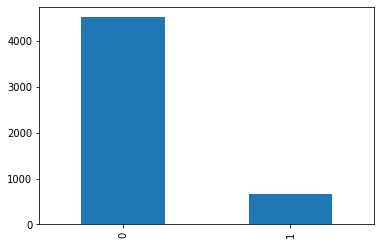

In [8]:
data['v1'].value_counts().plot(kind='bar')
#정상메일로 편중되어 있음.

In [9]:
data.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [10]:
# 특수 문자 제거 및 소문자로 변경
import re

def cleanText(data):
  text = re.sub('[^a-zA-Z]', ' ', data).lower()
  return text

data.v2 = data.v2.apply(cleanText)

In [11]:
X_data = data['v2']
y_data = data['v1']

In [12]:
data.iloc[5]['v2']

'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send         to rcv'

## Tokenizing


In [13]:
import nltk

In [14]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(data.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv']

In [15]:
# 영어 불용어 리스트
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'than', 't', 've', 'were', 'as', 'aren', 'few', "you're", 'should', 'ours', 'him', 'mightn', "shouldn't", 'itself', 'so', 'they', 'why', "don't", 'don', 'do', "isn't", "couldn't", "won't", 'i', 'am', 'here', 'the', 'your', 'ain', "haven't", "weren't", 'same', 'won', "hasn't", 'themselves', "wasn't", 'by', 'yourselves', "she's", 'after', 'not', 'then', 'shan', "that'll", 'further', "didn't", 'ma', 'whom', 'against', 'there', 'now', 'below', 'shouldn', 'isn', 'during', "doesn't", 'that', 'will', 'haven', 'when', 'it', 'been', 'couldn', 'with', 'mustn', 'for', 'those', 'm', "you'd", 'and', 'both', 'above', 'yours', 'to', 'what', "you'll", 'who', 'my', 'was', 'an', 'down', 'd', 'where', "mustn't", "it's", 'its', 'did', 'but', 'himself', 'be', 'doing', 'between', 'through', 'hers', 'does', 'wasn', 'had', 'having', 'from', 'o', 're', 'yourself', 'needn', 'most', 'only', 'my

In [16]:
! pip install nltk==3.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
from nltk.tokenize.moses import MosesTokenizer

mt_test = data.copy()
mt_test.v2 = Tokenizer(MosesTokenizer())
print(mt_test)

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
      v1                                                 v2
0      0  <keras_preprocessing.text.Tokenizer object at ...
1      0  <keras_preprocessing.text.Tokenizer object at ...
2      1  <keras_preprocessing.text.Tokenizer object at ...
3      0  <keras_preprocessing.text.Tokenizer object at ...
4      0  <keras_preprocessing.text.Tokenizer object at ...
...   ..                                                ...
5567   1  <keras_preprocessing.text.Tokenizer object at ...
5568   0  <keras_preprocessing.text.Tokenizer object at ...
5569   0  <keras_preprocessing.text.Tokenizer object at ...
5570   0  <keras_preprocessing.text.Tokenizer object at ...
5571   0  <keras_preprocessing.text.Tokenizer object at ..

In [22]:
#X_data = sequences
##시퀀스의 길이를 정해줘야 함.
#print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
#print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
#plt.hist([len(s) for s in X_data], bins=50)
#plt.xlabel('length of samples')
#plt.ylabel('number of samples')
#plt.show()

NameError: ignored

In [ ]:
# 전체 데이터셋의 길이는 max_len으로 맞춤.
#max_len = 172
#data = pad_sequences(X_data, maxlen = max_len)
#print("훈련 데이터의 크기(shape): ", data.shape)

In [ ]:
#X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
#y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
#X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
#y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장
#print("훈련용 이메일 데이터의 크기(shape): ", X_train.shape)
#print("테스트용 이메일 데이터의 크기(shape): ", X_test.shape)
#print("훈련용 레이블의 크기(shape): ", y_train.shape)
#print("테스트용 레이블의 크기(shape): ", y_test.shape)

##훈련 데이터와 테스트 데이터를 구분한 후 1D CNN에 넣음.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

#Word2Vec(Skip-gram)

Word2Vec 훈련 시키기 영어 데이터를 통해 주변에 어떠한 단어가 있는지 임베딩 수행

size = 임베딩 된 벡터의 차원.

window = 컨텍스트 윈도우 크기

min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

workers = 학습을 위한 프로세스 수

sg = 0은 CBOW, 1은 Skip-gram.




In [28]:

from gensim.models import Word2Vec
 # 스팸에 대해 학습
mt_test = data.copy()
model = Word2Vec(mt_test[mt_test.v1 == 1]['v2'], min_count=5, size=100, window=2, iter=200, sg=1) # skip-gram

In [31]:
model.save('w2v_model_spam') # 모델 저장
w2v_model_spam = Word2Vec.load('w2v_model_spam') # 모델 로드

In [32]:
w2v_model_spam.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

ValueError: ignored

In [ ]:
w2v_model_spam.wv.most_similar('free')

In [ ]:
# ham에 대해 학습
model2 = Word2Vec(mt_test[mt_test.v1 == 0]['v2'], min_count=5, size=100, window=2, iter=200, sg=1) # skip-gram
model2.save('w2v_model_ham')
w2v_model_ham = Word2Vec.load('w2v_model_ham')
w2v_model_ham.wv.doesnt_match("gt lt ok got know like good come ur time".split())

In [ ]:
w2v_model2_ham.wv.most_similar('ok')

워드 클라우드

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not Spam
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Spam
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

#1.Glove로 분류

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-09-08 14:50:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-09-08 14:50:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-08 14:50:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [24]:
import os

embedding_dict = dict()
embedding_dim = 100
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()# 각 줄을 읽어와서 word_vector에 저장.
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [27]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

NameError: ignored

In [ ]:
np.shape(embedding_matrix)



*  현재 훈련 데이터에 있는 단어들과 맵핑되는 사전 훈련된 워드 임베딩 벡터의 값을 임베딩 테이블에 저장



In [ ]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
#glove의 벡터가 100이기에
np.shape(embedding_matrix)